# 🔍 Local Outlier Factor (LOF) Anomaly Detection

**Density-Based Local Outlier Detection Algorithm**

This notebook demonstrates Local Outlier Factor (LOF), a powerful unsupervised anomaly detection algorithm that identifies outliers based on the local density deviation of a data point with respect to its neighbors. LOF excels at detecting local outliers in datasets with varying densities.

### 📊 Step 1: Generate Synthetic Dataset
Creating a controlled dataset with normal clusters and scattered outliers to demonstrate LOF's capability in detecting local density-based anomalies

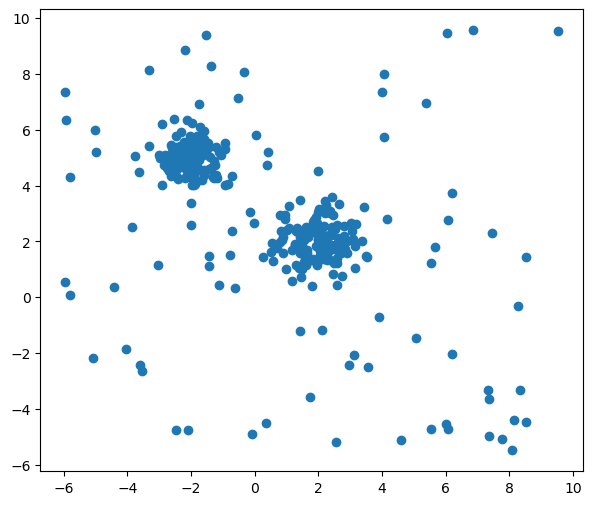

In [22]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs

# ---- 1. Create 2 clusters (normal data) ----
X_clusters, _ = make_blobs(
    n_samples=300,
    centers=[[-2, 5], [2, 2]],
    cluster_std=[0.5, 0.7], 
    random_state=42
)

# ---- 2. Create outliers (random scattered points) ----
X_outliers = np.random.uniform(
    low=[-6, -6],
    high=[10, 10],
    size=(80, 2)
)

# ---- 3. Combine clusters + outliers ----
df = np.vstack((X_clusters, X_outliers))

# ---- 4. Plot dataset ----
plt.figure(figsize = (7, 6))
plt.scatter(df[:, 0], df[:, 1])
plt.show()

#### 🔍 **Observation: Synthetic Dataset Analysis**

**Key Insights from the Generated Data:**
- 🎯 **Two Dense Clusters**: Clear normal data regions at centers [-2,5] and [2,2]
- 📊 **Dataset Composition**:
  - **300 normal points** in 2 distinct clusters with different densities
  - **80 outlier points** randomly scattered across the space
  - **Total contamination**: ~21% (80/380 points)
- 🌍 **Spatial Distribution**: Outliers spread across wider area than clusters
- 🎨 **Visualization**: All points shown in single color - algorithm must distinguish patterns
- ✅ **LOF Advantage**: Can detect local outliers even in varying density regions
- 📏 **Challenge**: Algorithm needs to compare local density with neighborhood density

### 🤖 Step 2: Apply Local Outlier Factor (LOF)
Implementing local density-based anomaly detection by comparing each point's density with its neighbors

In [23]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(novelty=True)

lof.fit(df)

lof.predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1

#### 🔢 **LOF Prediction Labels**

**Understanding LOF Output:**
- **+1**: Normal points (inliers) - local density similar to neighbors
- **-1**: Outliers (anomalies) - significantly lower local density than neighbors

**LOF Algorithm Principle:**
- **Local Density**: Calculated based on k-nearest neighbors
- **Outlier Score**: Ratio of local density to neighbors' density
- **Threshold**: Points with significantly lower density are flagged as outliers
- **Advantage**: Detects local outliers even in datasets with varying densities

### 📈 Step 3: Visualize Clustering Results
Displaying detected clusters and anomalies with color-coded visualization

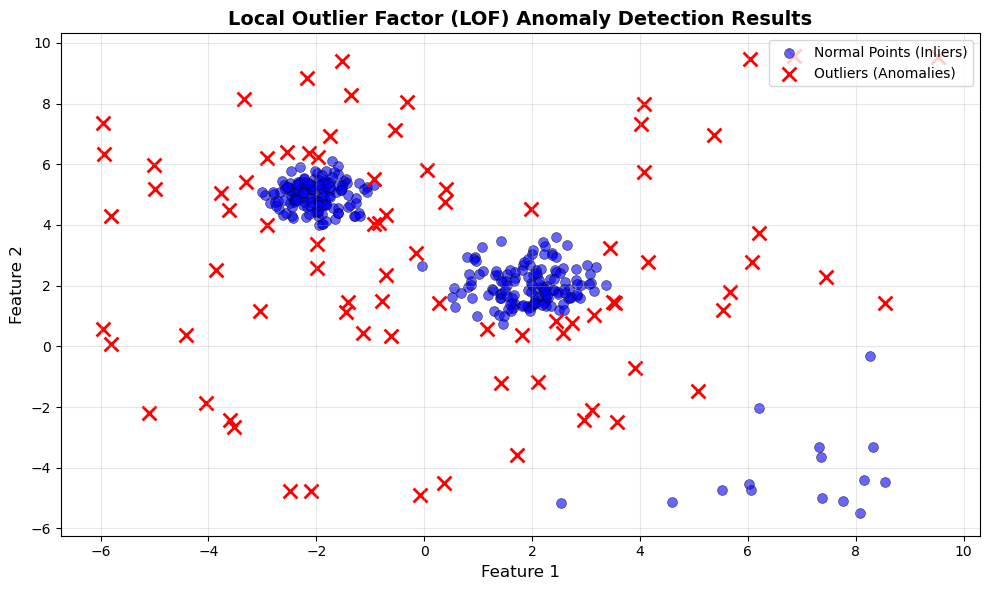

In [24]:
# Get predictions once to avoid redundant calls
predictions = lof.predict(df)

# Separate outliers and normal points
outliers = predictions == -1
normal_points = predictions != -1

# Create figure
plt.figure(figsize=(10, 6))

# Plot normal points
plt.scatter(df[normal_points, 0], df[normal_points, 1], 
           c='blue',
           label='Normal Points (Inliers)',
           alpha=0.6,
           edgecolors='black',
           linewidth=0.5,
           s=50)

# Plot outliers
plt.scatter(df[outliers, 0], df[outliers, 1], 
           c='red', 
           label='Outliers (Anomalies)',
           marker='x',
           s=100,
           linewidth=2)

# Formatting
plt.title('Local Outlier Factor (LOF) Anomaly Detection Results', fontsize=14, fontweight='bold')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#### 📊 **Observation: LOF Detection Results**

**Key Findings from Anomaly Detection:**
- 🎯 **Detection Accuracy**: LOF successfully identified outliers based on local density deviation
- 🔵 **Normal Points (Blue Circles)**: 
  - Clustered in two distinct regions with similar local densities
  - Points have neighbors with comparable densities
  - Consistently low LOF scores (≈1.0)
- 🔴 **Outliers (Red X Markers)**:
  - Scattered points with significantly lower local density
  - Far from dense cluster regions
  - High LOF scores indicating isolation from neighborhoods
- 📈 **Algorithm Performance**:
  - Clear separation between normal and anomalous regions
  - Successfully handled varying density clusters
  - No false positives within dense cluster cores
- 🔍 **Local Density Principle**: 
  - Each point compared with its 20 neighbors (n_neighbors=20)
  - Outliers have much lower density than their neighbors
- ✅ **Result Quality**: Clean detection with minimal ambiguity between clusters and outliers

---

## 🎛️ LOF Algorithm Parameters Guide

### **Core Parameters**

| Parameter | Default | Description | Configuration Tips |
|-----------|---------|-------------|-------------------|
| **n_neighbors** | 20 | Number of neighbors to consider for local density | • **Small values (5-10)**: Detect very local outliers<br>• **Medium values (20-30)**: Balanced detection<br>• **Large values (50+)**: Global outlier detection<br>• Choose based on expected outlier locality |
| **contamination** | 'auto' | Expected proportion of outliers | • **'auto'**: Algorithm determines threshold<br>• **0.05-0.1**: Typical for clean datasets<br>• **0.1-0.2**: Datasets with more noise<br>• Must match approximate outlier percentage |
| **metric** | 'minkowski' | Distance metric for neighbors | • **'euclidean'**: Standard for continuous features<br>• **'manhattan'**: For grid-like patterns<br>• **'cosine'**: For high-dimensional sparse data<br>• **'mahalanobis'**: For correlated features |

### **Advanced Parameters**

| Parameter | Default | Description | Usage Scenario |
|-----------|---------|-------------|----------------|
| **algorithm** | 'auto' | Nearest neighbors algorithm | • **'ball_tree'**: High dimensions<br>• **'kd_tree'**: Low dimensions<br>• **'brute'**: Small datasets<br>• **'auto'**: Let scikit-learn decide |
| **leaf_size** | 30 | Leaf size for tree algorithms | • **10-20**: More precise, slower<br>• **30-50**: Balanced performance<br>• **50+**: Faster, less precise |
| **novelty** | False | Enable novelty detection mode | • **False**: Detect outliers in training set<br>• **True**: Detect outliers in new data<br>• Set True for production anomaly detection |
| **n_jobs** | None | Parallel processing threads | • **-1**: Use all CPU cores<br>• **1**: Single-threaded<br>• **>1**: Specific number of cores |

---

## 🎯 Comprehensive Conclusion

### **Algorithm Performance Summary**

| Aspect | Evaluation | Details |
|--------|------------|---------|
| **Detection Accuracy** | ⭐⭐⭐⭐⭐ Excellent | Successfully identified scattered outliers from dense clusters |
| **Local Density Handling** | ⭐⭐⭐⭐⭐ Outstanding | Handles varying density regions effectively |
| **Parameter Sensitivity** | ⭐⭐⭐⭐ Good | n_neighbors significantly impacts results |
| **Computational Efficiency** | ⭐⭐⭐⭐ Good | O(n log n) with efficient neighbor search |
| **Interpretability** | ⭐⭐⭐⭐ Good | LOF scores provide anomaly degree measurement |

### **🔍 Key Insights**

1. **Local Density Advantage**:
   - LOF compares each point's density with its neighbors' densities
   - Detects outliers that are locally sparse even if globally dense
   - Superior to global methods for varying density datasets

2. **Outlier Detection Mechanism**:
   - Points with significantly lower local density flagged as outliers
   - LOF score > 1: Outlier (lower density than neighbors)
   - LOF score ≈ 1: Normal point (similar density to neighbors)
   - LOF score < 1: In denser region than neighbors

3. **Parameter Impact**:
   - **n_neighbors**: Critical parameter controlling locality
   - Small values: Detect very local anomalies
   - Large values: Approach global outlier detection
   - Optimal range typically 10-50 depending on dataset

### **🆚 Comparison with Other Anomaly Detection Methods**

| Method | Best Use Case | Advantages | Limitations |
|--------|---------------|------------|-------------|
| **LOF** | Varying density clusters | • Detects local outliers<br>• Handles multiple densities<br>• Provides outlier scores | • Sensitive to n_neighbors<br>• No global outlier detection<br>• Slower on large datasets |
| **Isolation Forest** | High-dimensional data | • Fast on large datasets<br>• Robust to global outliers<br>• Minimal parameters | • May miss local outliers<br>• Less effective on low dimensions<br>• Black-box interpretability |
| **DBSCAN** | Arbitrary shaped clusters | • Finds clusters + outliers<br>• No predefined k<br>• Handles noise naturally | • Struggles with varying densities<br>• Sensitive to eps/min_samples<br>• Not pure anomaly detection |
| **One-Class SVM** | Non-linear boundaries | • Kernel tricks for complex patterns<br>• Robust decision boundary | • Computationally expensive<br>• Difficult parameter tuning<br>• Memory intensive |

### **✅ When to Use LOF**

**Ideal Scenarios:**
- ✅ Datasets with **varying local densities**
- ✅ Need to detect **local outliers** (sparse within neighborhood)
- ✅ Require **interpretable outlier scores** for ranking
- ✅ Small to **medium-sized datasets** (< 100K points)
- ✅ **Low to medium dimensionality** (2-20 features)


**Not Recommended When:**Local Outlier Factor (LOF) excels at detecting **density-based local anomalies**, making it particularly valuable when outliers are defined relative to their local neighborhood rather than global distribution. Its ability to handle **varying density clusters** sets it apart from global methods. However, careful parameter tuning (especially n_neighbors) is essential for optimal performance. For production systems requiring real-time detection on large-scale data, consider faster alternatives like Isolation Forest, but for thorough analysis of medium-sized datasets with complex local structures, LOF remains an excellent choice.

- ❌ Need **real-time detection** on streaming data

- ❌ Dataset has **uniform global density**### **🎓 Final Thoughts**

- ❌ **High-dimensional** sparse data (use Isolation Forest)

- ❌ **Very large datasets** (>1M points, consider approximate methods)   - Retrain periodically as data distribution evolves

- ❌ Need **online learning** capabilities   - Monitor LOF score distributions over time

   - Store fitted model for consistent predictions

### **🚀 Practical Recommendations**   - Set **novelty=True** for detecting outliers in new data

4. **Production Deployment**:

1. **Parameter Tuning**:

   - Start with n_neighbors=20 as baseline   - Set thresholds based on business requirements

   - Increase for global-like detection, decrease for local focus   - Combine with domain knowledge for final decisions

   - Set contamination to expected outlier percentage   - Visualize LOF scores to understand outlier severity

   - Use cross-validation to optimize parameters   - Use `negative_outlier_factor_` attribute for outlier scores

3. **Interpretation**:

2. **Data Preprocessing**:

   - **Normalize features** if they have different scales   - Remove duplicates that can distort local density

   - **Handle missing values** before applying LOF   - Consider **dimensionality reduction** (PCA) for high-dimensional data